# Artificial Intelligence - 2nd Project
## Spruce Tree Type Detection

This project consists in the application of machine learning models and algorithms
related to supervised learning.

The dataset Spruce.csv contains cartographic data for observations made over different 30m × 30m patches in the forests of Alberta, Canada. This dataset has 15,120 observations, with 44 input variables (cartographic variables) and 1 target variable (Tree_Type).

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, matthews_corrcoef, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import time
from collections import Counter
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

## Creating the Dataframe based on Dataset 'Spruce.csv'

In [82]:
data = pd.read_csv("dataset/Spruce.csv")

data.head()

Elevation  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      3                               258   
1       2590      2                               212   
2       2804      9                               268   
3       2785     18                               242   
4       2595      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Horizontal_Distance_To_Fire_Points  Soil_Type1  Soil_Type2  Soil_Type3  \
0                                6279           0           0           0   
1                                6225           0           0           0   
2                                6121           0           0           0   
3                                6211           0           0           0   
4                                6172           0           0           0   

   Soil_Type4  ...  Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  \
0           0  ...            0            0            0            0   
1           0  ...            0            0            0            0   
2           0  ...            0            0            0            0   
3           0  ...            0            0            0            0   
4           0  ...            0            0            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Tree_Type  
0            0            0            0            0            0      Other  
1            0            0            0            0            0      Other  
2            0            0            0            0            0      Other  
3            0            0            0            0            0      Other  
4            0            0            0            0            0      Other  

[5 rows x 45 columns]

## 1. Exploratory Data Analysis (EDA)
### Check the class distribution and visualize it

In [83]:
data.describe()

Elevation         Slope  Horizontal_Distance_To_Hydrology  \
count  15120.000000  15120.000000                      15120.000000   
mean    2749.322553     16.501587                        227.195701   
std      417.678187      8.453927                        210.075296   
min     1863.000000      0.000000                          0.000000   
25%     2376.000000     10.000000                         67.000000   
50%     2752.000000     15.000000                        180.000000   
75%     3104.000000     22.000000                        330.000000   
max     3849.000000     52.000000                       1343.000000   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
count                    15120.000000                     15120.000000   
mean                        51.076521                      1714.023214   
std                         61.239406                      1325.066358   
min                       -146.000000                         0.000000   
25%                          5.000000                       764.000000   
50%                         32.000000                      1316.000000   
75%                         79.000000                      2270.000000   
max                        554.000000                      6890.000000   

       Horizontal_Distance_To_Fire_Points    Soil_Type1    Soil_Type2  \
count                        15120.000000  15120.000000  15120.000000   
mean                          1511.147288      0.023479      0.041204   
std                           1099.936493      0.151424      0.198768   
min                              0.000000      0.000000      0.000000   
25%                            730.000000      0.000000      0.000000   
50%                           1256.000000      0.000000      0.000000   
75%                           1988.250000      0.000000      0.000000   
max                           6993.000000      1.000000      1.000000   

         Soil_Type3    Soil_Type4  ...   Soil_Type29   Soil_Type30  \
count  15120.000000  15120.000000  ...  15120.000000  15120.000000   
mean       0.063624      0.055754  ...      0.021958      0.045635   
std        0.244091      0.229454  ...      0.146550      0.208699   
min        0.000000      0.000000  ...      0.000000      0.000000   
25%        0.000000      0.000000  ...      0.000000      0.000000   
50%        0.000000      0.000000  ...      0.000000      0.000000   
75%        0.000000      0.000000  ...      0.000000      0.000000   
max        1.000000      1.000000  ...      1.000000      1.000000   

        Soil_Type31   Soil_Type32   Soil_Type33   Soil_Type34   Soil_Type35  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.040741      0.001455      0.006746      0.000661      0.002249   
std        0.197696      0.038118      0.081859      0.025710      0.047368   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type36   Soil_Type37   Soil_Type38  
count  15120.000000  15120.000000  15120.000000  
mean       0.048148      0.043452      0.030357  
std        0.214086      0.203880      0.171574  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000  

[8 rows x 44 columns]

Tree_Type
Other     12960
Spruce     2160
Name: count, dtype: int64


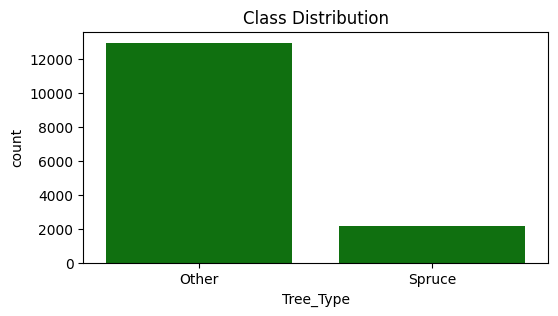

In [84]:
print(data['Tree_Type'].value_counts())

plt.figure(figsize=(6, 3))
sns.countplot(x='Tree_Type', data=data, color='green')
plt.title('Class Distribution')
plt.show()

## 2. Data Pre-processing

### Encode target variable 'Tree_Type'
Since 'Tree_Type' is in string format, there is the need to convert it to integer to be able to use it in our models.

In [85]:
label_encoder = LabelEncoder()
data['Tree_Type'] = label_encoder.fit_transform(data['Tree_Type'])

### Replace Soil_Type1 to Soil_Type38 with a single column Soil_Type
Also we will need to aggregate the 'Soil_Type' because the way that it is stored in the dataset is not ideal at all. With that, we will number the 'Soil_Type' from 1 to 38, since there are 38 different types of soil.

In [86]:
soil_type_cols = [f'Soil_Type{i}' for i in range(1, 39)]
data['Soil_Type'] = data[soil_type_cols].idxmax(axis=1).str.extract(r'(\d+)').astype(int)
data.drop(soil_type_cols, axis=1, inplace=True)

### Normalize distances (%)

In [87]:
data['Elevation'] = (data['Elevation'] - data['Elevation'].min()) / (data['Elevation'].max() - data['Elevation'].min())
data['Slope'] = (data['Slope'] - data['Slope'].min()) / (data['Slope'].max() - data['Slope'].min())
data['Horizontal_Distance_To_Hydrology'] = (data['Horizontal_Distance_To_Hydrology'] - data['Horizontal_Distance_To_Hydrology'].min()) / (data['Horizontal_Distance_To_Hydrology'].max() - data['Horizontal_Distance_To_Hydrology'].min())
data['Vertical_Distance_To_Hydrology'] = (data['Vertical_Distance_To_Hydrology'] - data['Vertical_Distance_To_Hydrology'].min()) / (data['Vertical_Distance_To_Hydrology'].max() - data['Vertical_Distance_To_Hydrology'].min())
data['Horizontal_Distance_To_Roadways'] = (data['Horizontal_Distance_To_Roadways'] - data['Horizontal_Distance_To_Roadways'].min()) / (data['Horizontal_Distance_To_Roadways'].max() - data['Horizontal_Distance_To_Roadways'].min())
data['Horizontal_Distance_To_Fire_Points'] = (data['Horizontal_Distance_To_Fire_Points'] - data['Horizontal_Distance_To_Fire_Points'].min()) / (data['Horizontal_Distance_To_Fire_Points'].max() - data['Horizontal_Distance_To_Fire_Points'].min())

data.head()

Elevation     Slope  Horizontal_Distance_To_Hydrology  \
0   0.369084  0.057692                          0.192107   
1   0.366062  0.038462                          0.157856   
2   0.473817  0.173077                          0.199553   
3   0.464250  0.346154                          0.180194   
4   0.368580  0.038462                          0.113924   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                        0.208571                         0.074020   
1                        0.200000                         0.056604   
2                        0.301429                         0.461538   
3                        0.377143                         0.448476   
4                        0.207143                         0.056749   

   Horizontal_Distance_To_Fire_Points  Tree_Type  Soil_Type  
0                            0.897898          0         27  
1                            0.890176          0         27  
2                            0.875304          0         11  
3                            0.888174          0         28  
4                            0.882597          0         27

## 3. Identification of Target Concept
### Analysing the target variable 'Tree_Type' and its correlation with the other features

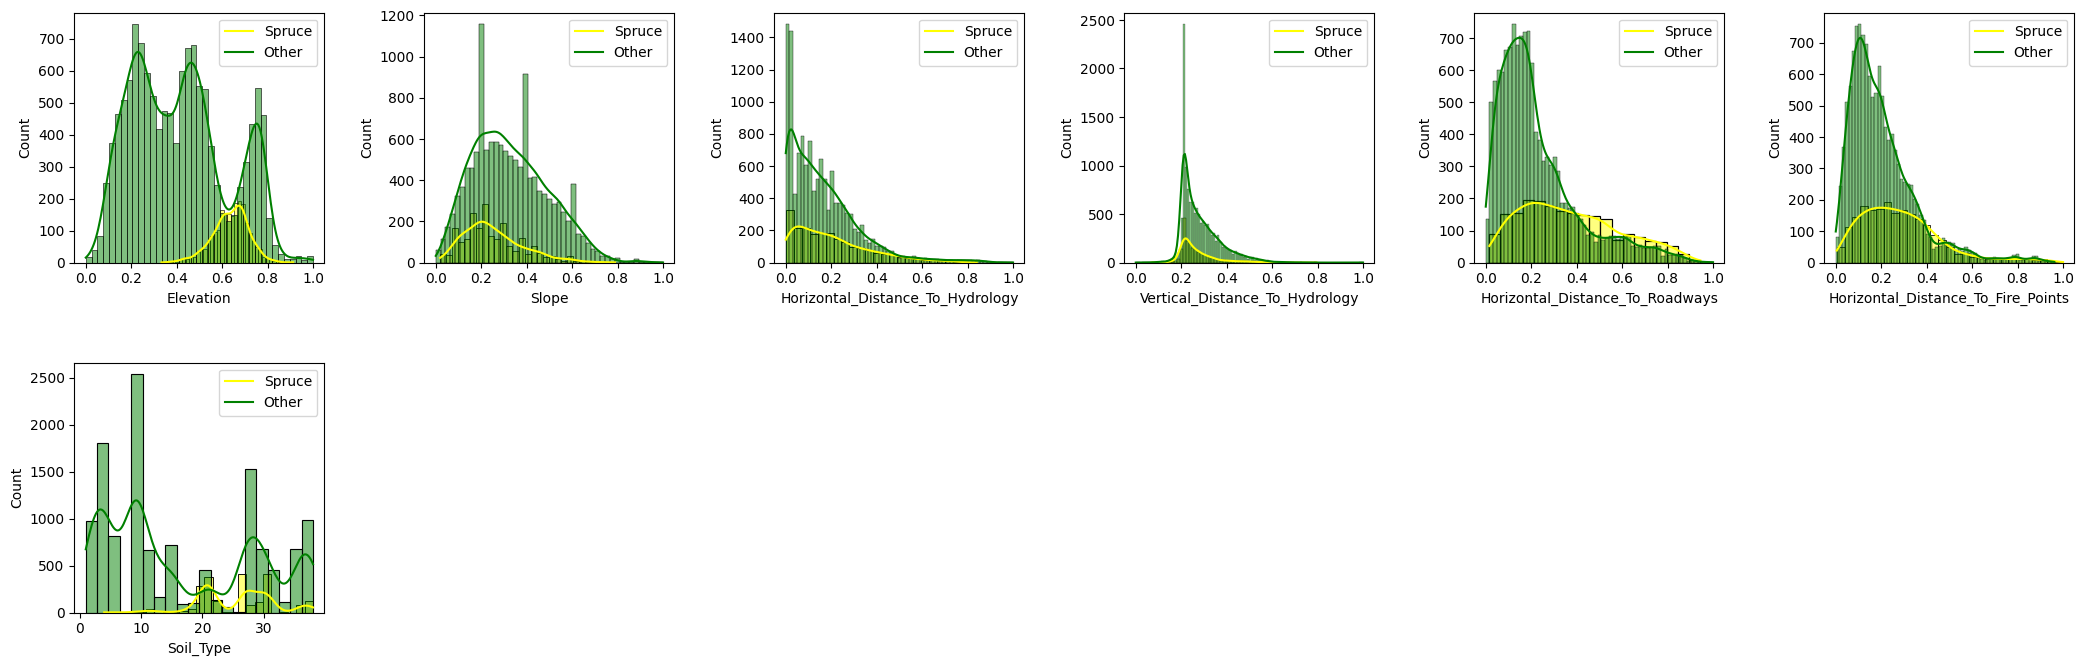

In [88]:
df1 = data[data['Tree_Type'] == 1]
df2 = data[data['Tree_Type'] == 0]

df1 = df1.drop(['Tree_Type'], axis=1)
df2 = df2.drop(['Tree_Type'], axis=1)

cols = list(df1.columns)

plt.figure(figsize=(25, 25))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for i, col in enumerate(cols):
    plt.subplot(6, 6, i + 1)
    sns.histplot(data=df1[col], color='yellow', label='Spruce', kde=True)
    sns.histplot(data=df2[col], color='green', label='Other', kde=True)
    _, axes = plt.gca().get_legend_handles_labels()
    plt.legend(axes, prop={'size': 10})

plt.show()

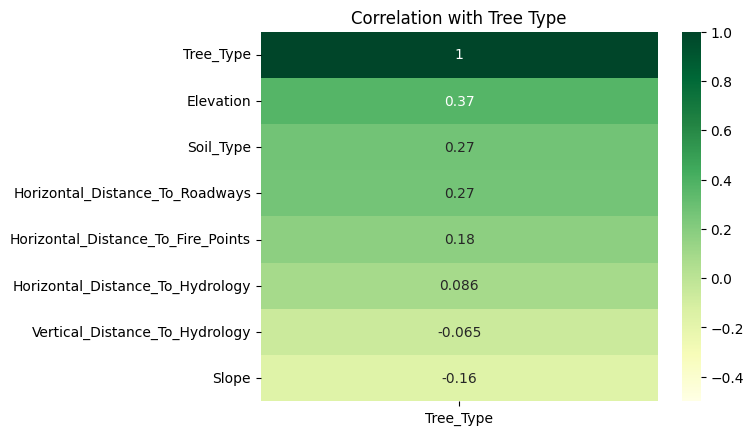

In [89]:
corr = data.corr()['Tree_Type'].sort_values(ascending=False)

# Plot the correlation heatmap
sns.heatmap(corr.to_frame(), annot=True, cmap='YlGn', vmin=-0.5, vmax=1)
plt.title('Correlation with Tree Type')

plt.show()

### Correlation Between Features

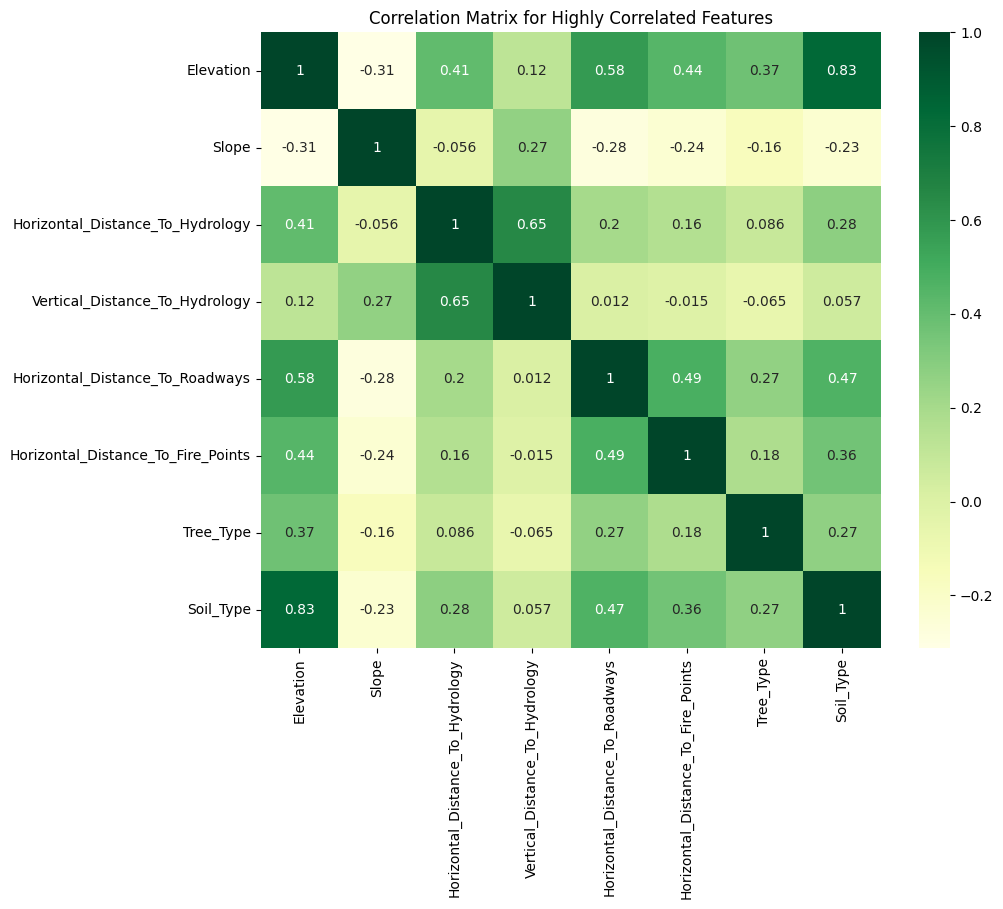

In [90]:
corr_matrix = data.corr()

top_corr_features = corr_matrix.index

plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix for Highly Correlated Features')
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGn")

Checking the correlation between the features it's possible to observe that the values are very low, which means that the features are not sufficiently correlated to be able to remove any of them.

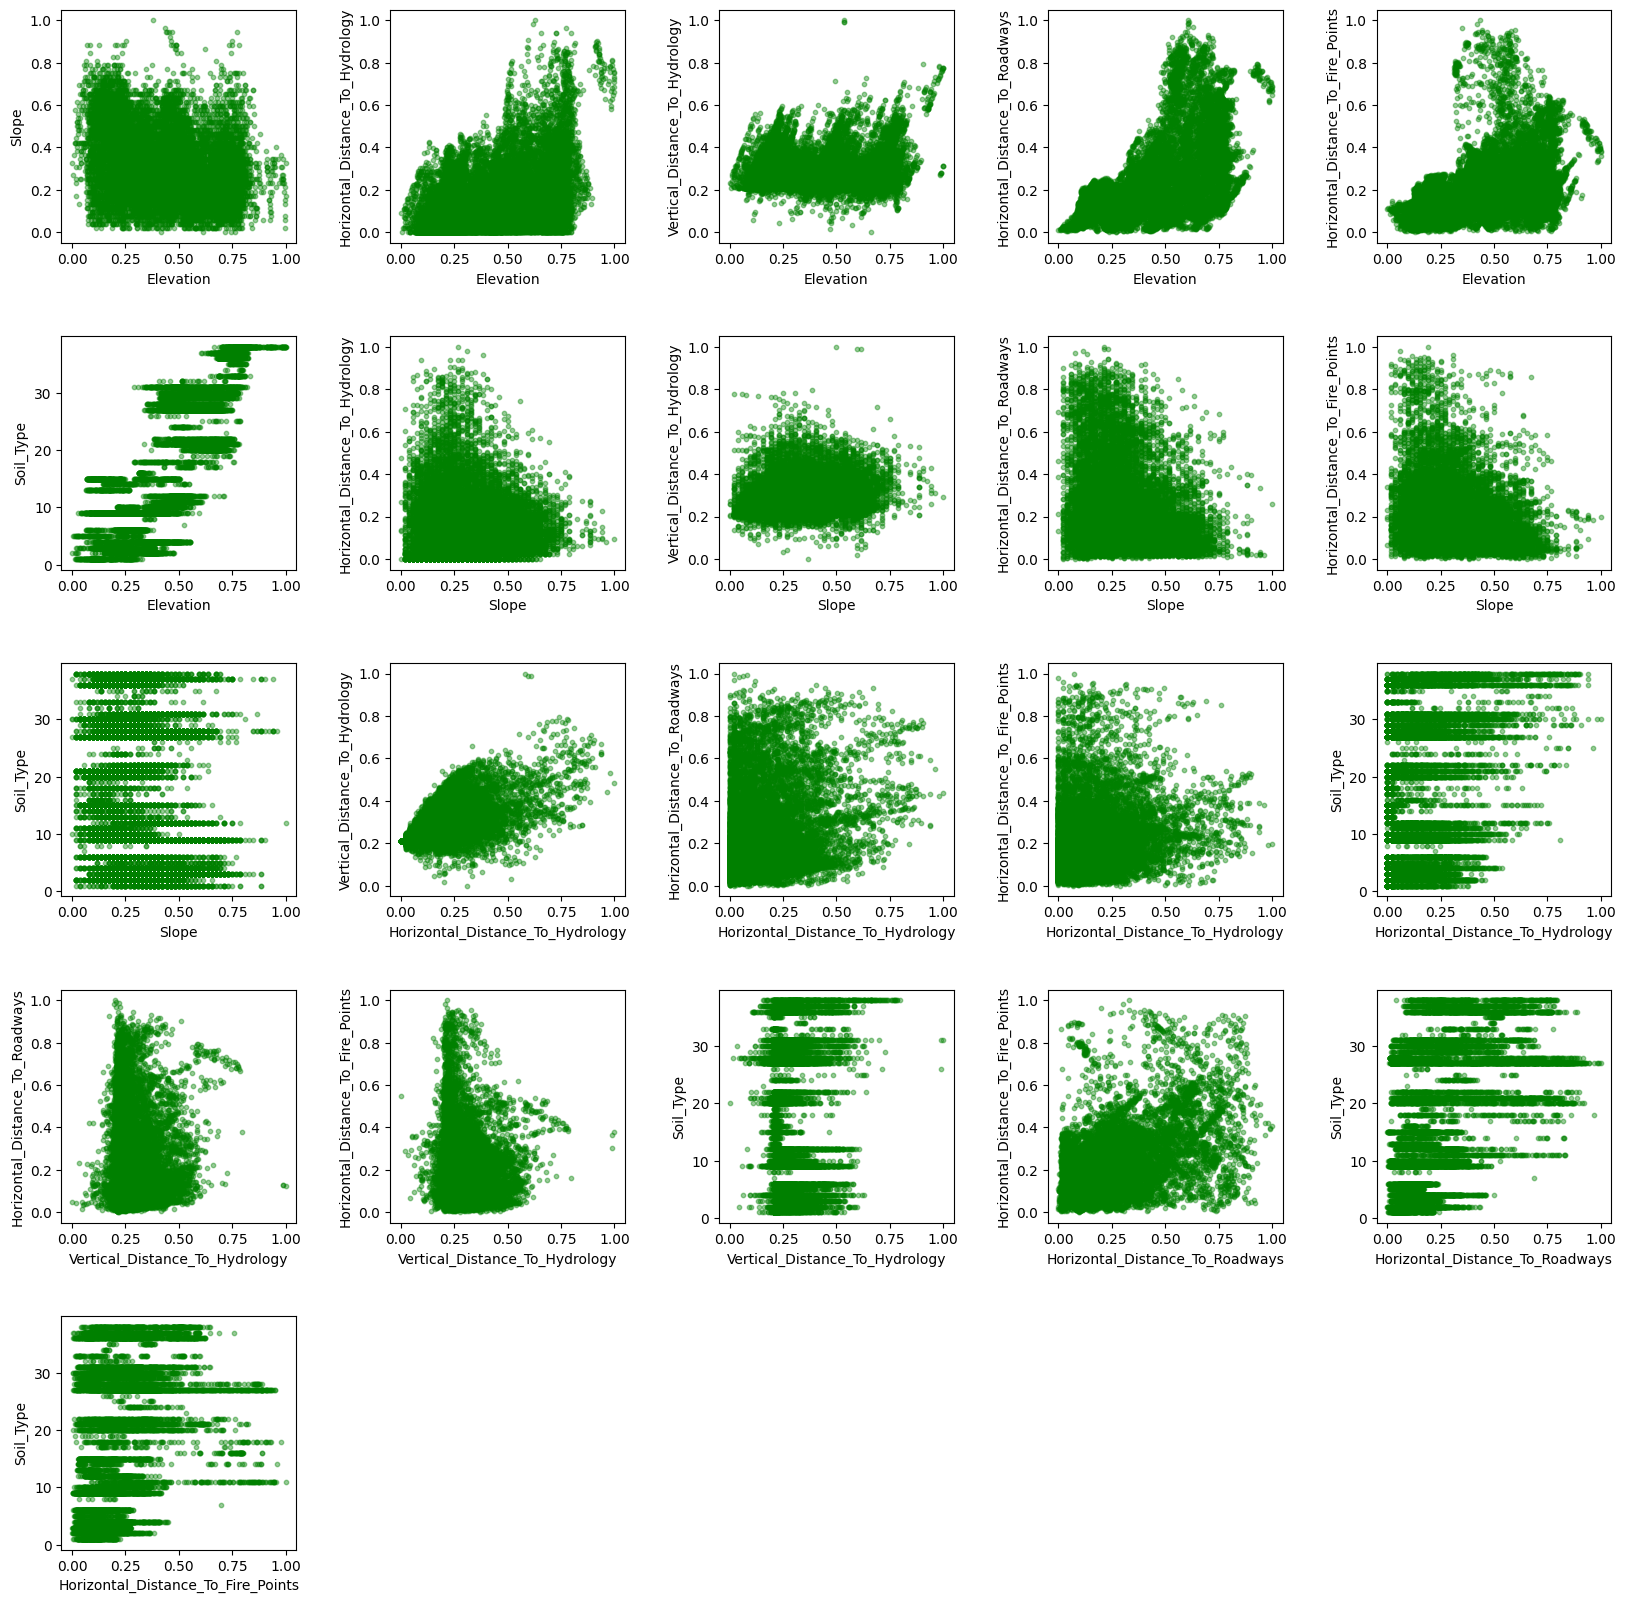

In [91]:
cols = list(data.columns)

# Remove the target variable ('Tree_Type') from the list of columns
cols.remove('Tree_Type')

plot_cols = []

# Calculate pairwise correlations
for i, col1 in enumerate(cols):
    for col2 in cols[i+1:]:
        corr = math.fabs(data[col1].corr(data[col2]))
        corr = round(corr, 2)
        plot_cols.append([col1, col2])

# Check if any pairs were found
if not plot_cols:
    print("No pairs of columns with correlation > 0 were found.")
else:
    # Calculate the number of rows and columns for the grid
    num_plots = len(plot_cols)
    num_rows = int(math.ceil(math.sqrt(num_plots)))
    num_cols = int(math.ceil(num_plots / num_rows))

    # Create a figure and adjust the subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    # Flatten the axs array for easier iteration
    axs = axs.flatten()

    for ax, cols in zip(axs, plot_cols):
        ax.scatter(data[cols[0]], data[cols[1]], s=10, c='green', alpha=0.4)
        ax.set_xlabel(cols[0], fontsize=10)
        ax.set_ylabel(cols[1], fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=10)

    # Remove any unused subplots
    for ax in axs[len(plot_cols):]:
        ax.axis('off')

    plt.show()

By analysing the graphs above, we can verify that no feature is highly related to any other, so there is no need to create a new dataframe with reduced features less related to each other.

## 4. Definition of the training and test sets
### Split the data into features (X) and labels (y)

In [92]:
features = data.drop('Tree_Type', axis=1)
labels = data['Tree_Type']

### Split the dataset into training and testing sets

In [93]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

### Custom function to oversample the minority class

In [94]:
def oversample(X, y):
    # Count the number of instances for each class
    class_counts = Counter(y)
    
    # Find the majority class count
    majority_count = max(class_counts.values())
    
    # Create empty lists to store the oversampled data
    oversampled_X = []
    oversampled_y = []
    
    # Oversample the minority classes
    for class_label, count in class_counts.items():
        if count < majority_count:
            # Duplicate instances of the minority class
            X_class = X[y == class_label]
            y_class = y[y == class_label]
            num_duplicates = majority_count - count
            oversampled_X.extend(X_class.values.tolist() * num_duplicates)
            oversampled_y.extend(y_class.values.tolist() * num_duplicates)
        
        # Add the majority class instances
        oversampled_X.extend(X[y == class_label].values.tolist())
        oversampled_y.extend(y[y == class_label].values.tolist())
    
    return pd.DataFrame(oversampled_X, columns=X.columns), pd.Series(oversampled_y)

## 5. Selection and Parameterization of Learning Algorithms
### Initialize models


In [95]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),
    LogisticRegression(),
    GaussianNB(),
    MLPClassifier(),
    XGBClassifier(),
    LGBMClassifier(verbose=-1),
    CatBoostClassifier(verbose=0)
]

In [96]:
model_names = ['DTC', 'RFC', 'GBC', 'KNC', 'SVC', 'LR', 'GNB', 'MLP', 'XGB', 'LGBM', 'CatBoost']
accuracies = []
f1_scores = []
confusion_matrices = []
results = []

for model, model_name in zip(models, model_names):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    total_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    auc = roc_auc_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred, average='macro') * 100
    f1 = f1_score(y_test, y_pred, average='macro') * 100
    kappa = cohen_kappa_score(y_test, y_pred) * 100
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='macro') * 100
    
    results.append([model_name, accuracy, auc, recall, f1, kappa, mcc, total_time, precision])

columns = ['Model', 'Accuracy', 'AUC', 'Recall', 'F1', 'Kappa', 'MCC', 'Prec', 'TT (Sec)']
results_df = pd.DataFrame(results, columns=columns)

# Sort the DataFrame by the 'Accuracy' column in descending order
sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)

print(sorted_results_df.round(2))

       Model  Accuracy    AUC  Recall     F1  Kappa    MCC  Prec  TT (Sec)
1        RFC     93.42  85.23   85.23  85.98  71.96  71.99  1.21     86.78
8        XGB     93.06  85.21   85.21  85.43  70.85  70.85  0.15     85.64
10  CatBoost     92.89  84.92   84.92  85.09  70.19  70.19  7.72     85.27
9       LGBM     92.13  83.08   83.08  83.42  66.83  66.84  0.16     83.76
3        KNC     91.96  81.59   81.59  82.66  65.33  65.41  0.12     83.85
2        GBC     90.97  80.32   80.32  80.84  61.68  61.70  1.34     81.39
0        DTC     90.71  81.26   81.26  80.86  61.72  61.73  0.05     80.48
7        MLP     89.05  67.66   67.66  71.51  43.61  46.12  9.06     80.11
4        SVC     86.08  50.00   50.00  46.26   0.00   0.00  2.40     43.04
5         LR     85.09  51.02   51.02  49.26   3.16   4.97  0.14     56.07
6        GNB     80.13  73.12   73.12  67.41  35.80  37.70  0.00     65.36


## 6. Results Comparison
### Visualize and compare results

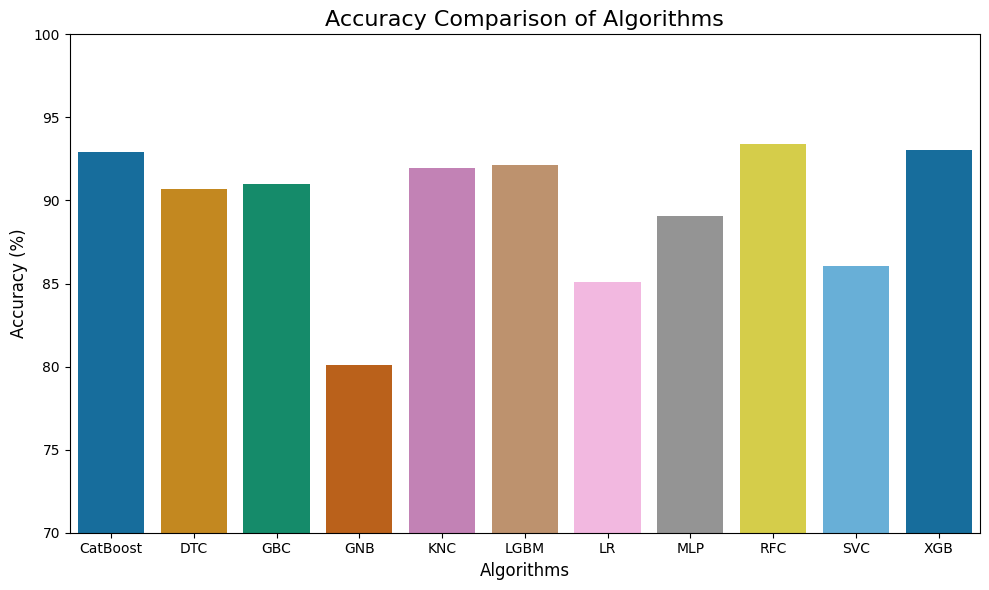

In [97]:
# Create a DataFrame with model names and accuracy scores
accuracy_data = pd.DataFrame({'Model': model_names, 'Accuracy': [results_df.loc[results_df['Model'] == model_name, 'Accuracy'].values for model_name in model_names]})
accuracy_data = accuracy_data.explode('Accuracy')

# Calculate mean accuracy for each model
mean_accuracy = accuracy_data.groupby('Model')['Accuracy'].mean().reset_index()

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=mean_accuracy, palette='colorblind', order=mean_accuracy['Model'].values)

# Set y-axis limits
ax.set_ylim(70, 100)
ax.set_yticks(range(70, 101, 5))

# Add labels and title
ax.set_xlabel('Algorithms', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Accuracy Comparison of Algorithms', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

Analysing the table generated above, it is possible to conclude that Random Forest Classifier is the best model, since it has the highest accuracy of all models used.

In [98]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
best_model.score(X_train, y_train)

1.0

In [100]:
best_model.score(X_test, y_test)

0.9351851851851852

### Feature Importance

In [101]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

In [102]:
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

Feature ranking:
1. feature 0 (0.3058300699967213)
2. feature 6 (0.19124657725615626)
3. feature 4 (0.14031426877050743)
4. feature 5 (0.1262422956866901)
5. feature 3 (0.08578242349858131)
6. feature 2 (0.08273476487099082)
7. feature 1 (0.06784959992035278)


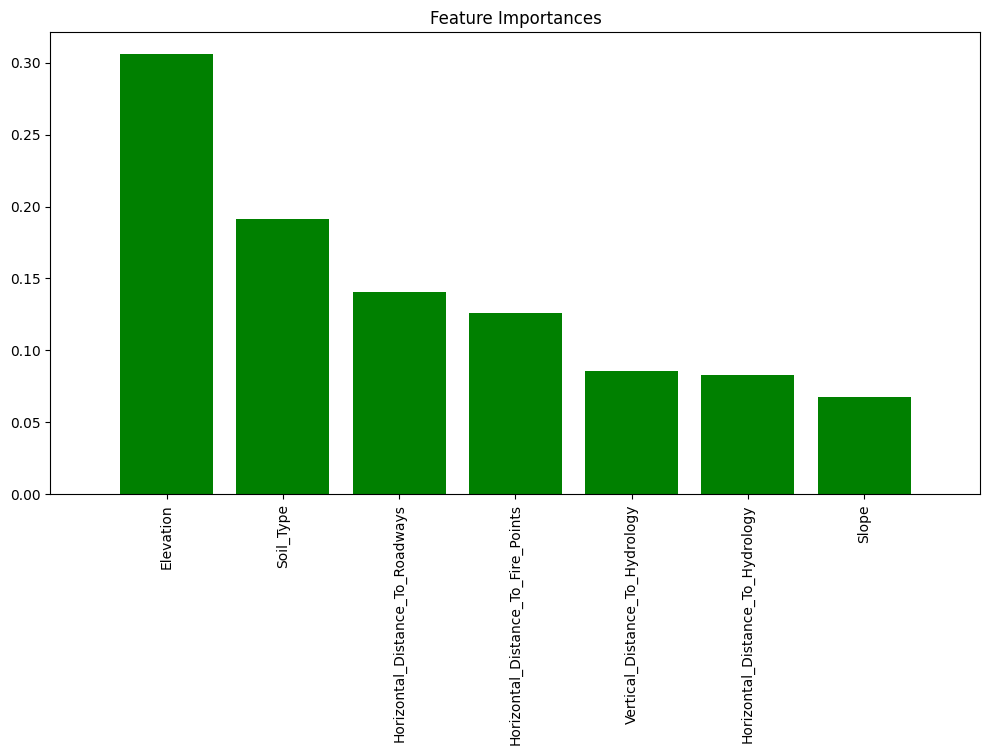

In [103]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center", color='green')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Confusion Matrix

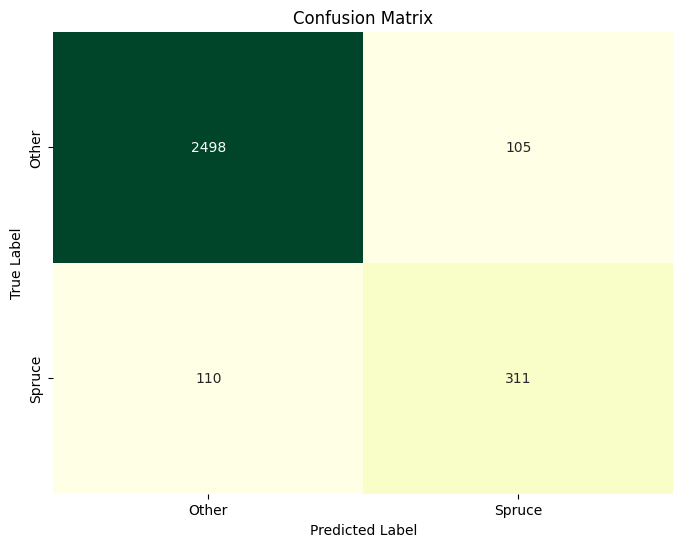

In [104]:
y_predicted = model.predict(X_test)
confusion_matrix_res = confusion_matrix(y_test, y_predicted)

# Create a custom colormap for yellow and green tones
cmap = sns.color_palette("YlGn", as_cmap=True)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_res, annot=True, fmt='d', cmap=cmap, cbar=False,
            xticklabels=["Other", "Spruce"], yticklabels=["Other", "Spruce"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<p>Accuracy: 93%, indicating a high level of correctness in its predictions.</p>
<p>Precision and Recall for 'Spruce': 75% and 74% respectively, highlighting a balanced performance in identifying 'spruce' trees.</p>
<p>F1 Score for 'Spruce': 74% reflects a balanced trade-off between precision and recall.</p>